# Latent Semantic Analysis

## Introduction

Linear algebra plays a pivotal role in various fields, offering powerful tools
and techniques for solving complex problems and extracting meaningful insights from data. One intriguing application of linear algebra in the realm of natural language processing and information retrieval is Latent Semantic Analysis (LSA). LSA is a mathematical and statistical method that involves the application of singular value decomposition (SVD) to large datasets, commonly represented in matrix form, with the aim of uncovering latent semantic structures within the data.

## Dataset


The fetch_20newsgroups dataset from scikit-learn's datasets module is a popular text dataset commonly used for natural language processing and machine learning tasks, particularly for text classification and clustering. This dataset comprises a collection of approximately 20,000 newsgroup documents, spanning 20 different newsgroups or categories. Each newsgroup represents discussions on a specific topic or theme, and the dataset as a whole reflects the diversity of topics discussed in online forums during the late 1990s. In this assignment, We'll only use 5 of the 20 newsgroups for simplicity and efficiency.

In [21]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
import numpy as np
import scipy
import matplotlib.pyplot as plt

categories =  ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.electronics', 'sci.space']
train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

## Demonstration

In [22]:
print(train.data[0])
print(len(train.data))

From: halsall@murray.fordham.edu (Paul Halsall)
Subject: Catholic Liturgy
Reply-To: halsall@murray.fordham.edu
Organization: J. Random Misconfigured Site
Lines: 60


	The problems with Catholic liturgy are likely to continue for
some time.  The problem is, in a nutshell, this: the Liturgy is a
symbolic action - in other words Catholics do [or should] believe that
the _signs_ during the mass - Water, Blessings, Vestments, Altar,
Relics, etc - are real. That is the sprinkling of water bestows real,
almost tangible, holiness, the Vestments are a real indication of real
sacred time. The point of a _symbol_ is that it is understood by all
to be connected to an underlying REAL referent. This kind of thinking
precludes analysis; holy water is not holy because of anything, it
simply IS holy.

But, modern westerners find it extremely difficult, especially if
well- educated, to think of the mass as a symbol. We are more likely
to see it as a _sign_, ie an action that represents grace, but which


## Document-term co-occurrence Matrix

In a document-term co-occurrence matrix, each row corresponds to a document in the dataset, and each column corresponds to a unique term. The entry in cell $M_{ij}$ represents the frequency of term $j$ occurring in document
$i$. Now create the co-occurrence matrix using `CountVectorizer`.
analyze the sparsity of $M$ and $M^TM$.

In [23]:
def vectorize(train_data):
    # TODO: Vectorize the training data using count vectorizer
    CV = CountVectorizer()
    co_matrix = CV.fit_transform(train_data)
    return CV, co_matrix

def analyze(data):
    # TODO: print Shape, Is Sparse and Sparsity using scipy
    print("data dimensions: ", data.shape)
    print("is data sparse? ", scipy.sparse.isspmatrix(data))
    sparcity = 1 - data.nnz / (data.shape[0] * data.shape[1])
    sparcity *= 100
    print("sparsity = ", sparcity)

count_vect, X_train_counts = vectorize(train.data)
analyze(X_train_counts)
C = X_train_counts.T * X_train_counts
analyze(C)

data dimensions:  (2847, 40182)
is data sparse?  True
sparsity =  99.61398940056323
data dimensions:  (40182, 40182)
is data sparse?  True
sparsity =  96.20188906490104


## Singular Value Decomposition

The next step involves finding the Singular Value Decomposition (SVD) matrix and embedding the data into a reduced-dimensional space. Describe the process of obtaining the SVD for the document-term co-occurrence matrix. What are the resulting matrices $(U, Σ, V^T)$, and how do they relate to the original matrix.

In [24]:
# TODO: Use SVD to decompose C into U, S, V^H using scipy
u , s , vh = scipy.sparse.linalg.svds(C.astype(float), k=2)
print(f'U: {u.shape}')
print(f'S: {s.shape}')
print(f'V^H: {vh.shape}')
print("the orginal matrix is reconstructed using U * S * V^H")

U: (40182, 2)
S: (2,)
V^H: (2, 40182)
the orginal matrix is reconstructed using U * S * V^H


Define the concept of choosing the top-k singular values in the context of the Σ matrix obtained from SVD. What does it mean to truncate the singular values, and how does this process contribute to dimensionality reduction. Discuss the criteria or considerations involved in selecting an appropriate value for k. How might the choice of k impact the quality of the resulting reduced-dimensional space and the representation of latent semantic structures.

In [25]:
### by choosing the top k singular values of a matrix, in the reconstructed matrix
### we will see a matrix with lower rank than orginal matrix by removing less important singular values
### this is called a truncated svd
### for finding the best k, we will have to look at our needs and resources to decide how much information to keep

Calculate the new matrix resulting from the truncated SVD with the chosen top-k singular values.

In [26]:
# reconstructed_matrix = np.linalg.multi_dot([u, np.diag(s), vh])

Discuss the interpretation of the resulting matrices U and V. How do these matrices contribute to the understanding of semantic relationships between documents and terms.

In [27]:
### U and V are eigenvectors of M^TM or singularvectors of M, which tell us about the relation of terms and documents
### U shows a linear combanation of terms that construct the documents
### V represents a linear combanation of documents that create the terms

## Word Embedding

Word embedding is a technique used to map words from a vocabulary to vectors of real numbers. These vectors capture the semantic relationships between words in a geometric space, where words that share similar meanings are mapped to similar vectors. Word embedding is a popular approach in natural language processing and information retrieval, and is commonly used in the development of language models in machine learning. We use the $i$ th row of $U$ as the embedding vector for the $i$ th word in the vocabulary.

In [28]:
def cosine_similarity(a, b):
    # TODO: Compute cosine similarity between a and b
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def word_similarity(word1, word2):
    # TODO: Compute cosine similarity between word1 string and word2 string
    sim = cosine_similarity(u[count_vect.vocabulary_[word1]],u[count_vect.vocabulary_[word2]])
    return sim

print(f"similarity of `mahdi` and `game`: {word_similarity('mahdi', 'game')}")
print(f"similarity of `game` and `baseball`: {word_similarity('game', 'baseball')}")
print(f"similarity of `evil` and `friend`: {word_similarity('evil', 'friend')}")
print(f"similarity of `good` and `game`: {word_similarity('good', 'game')}")
print(f"similarity of `baseball` and `mahdi`: {word_similarity('baseball', 'mahdi')}")
print(f"similarity of `good` and `evil`: {word_similarity('good', 'evil')}")

similarity of `mahdi` and `game`: 0.9979142684357539
similarity of `game` and `baseball`: 0.8961442259704014
similarity of `evil` and `friend`: 0.20548988419663547
similarity of `good` and `game`: 0.4939271494953208
similarity of `baseball` and `mahdi`: 0.9229214164398979
similarity of `good` and `evil`: -0.023541425726420918


## Plot Embeddings

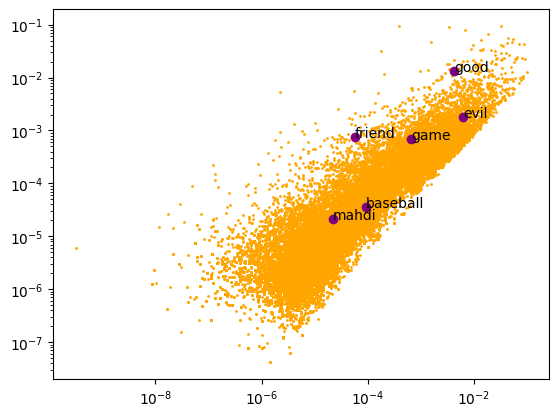

In [29]:
def plot_word(word):
    # TODO: plot the absolute value of the word vector
    # TODO: add the word label to the plot
    vec = u[count_vect.vocabulary_[word]]
    plt.scatter(abs(vec[0]),abs(vec[1]), label=word, color='purple')
    plt.annotate(word, (abs(vec[0]),abs(vec[1])), label=word)
    pass


# plot embeddings with norms less than 0.1
norms = np.linalg.norm(u, axis=1)
filtered_embeddings = u[norms < 0.1]
plt.scatter(np.abs(filtered_embeddings[:, 0]), np.abs(filtered_embeddings[:, 1]), label='Embeddings with norms < 0.1', color='orange', s = 1)

plot_word('mahdi')
plot_word('game')
plot_word('baseball')
plot_word('evil')
plot_word('good')
plot_word('friend')
# set x and y scales to logaritmic for better visualization
plt.xscale('log')
plt.yscale('log')
plt.show()

# Word2Vec (Optional)

Word2Vec is a popular word embedding technique that involves the use of neural networks to learn word embeddings from large datasets. The Word2Vec model is trained on a large corpus of text, and the resulting word vectors demonstrate interesting semantic relationships between words. In this assignment, we'll explore the use of Word2Vec to learn word embeddings from the 20 newsgroups dataset.

Word2Vec is mainly implemented in two ways: continuous bag-of-words (CBOW) and skip-gram. In this assignment, we'll use the CBOW model to train word embeddings on the 20 newsgroups dataset. CBOW predicts the current word based on a window of surrounding context words. The skip-gram model, on the other hand, predicts the surrounding context words based on the current word.

![image.png](attachment:image.png)

## Preprocessing

We'll remove stopwords and lemmatize the text data using the WordNetLemmatizer from the nltk package. We'll also remove punctuation and convert all text to lowercase.
Then we create a list of windows of context words for each word in the corpus. The size of the window is a hyperparameter that can be tuned to improve the performance of the model. We'll use a window size of 2 for this assignment.

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

def clean_data(train_data):
    cleaned_words = []
    words_index = {}
    for text in train_data:
        text = text.lower()
        text = text.replace('\n', ' ')
        tokenized_data = word_tokenize(text)
        stop_words = set(stopwords.words('english'))
        stop_words.update(['.',',',':',';','(',')','#','--','...','"'])
        cleaned_words += [word for word in tokenized_data if word not in stop_words]
    for word in cleaned_words:
        if word not in words_index:
            words_index[word] = len(words_index)
    windows = []
    for i in range(2, len(cleaned_words) - 2):
        window = [cleaned_words[i - 2], cleaned_words[i - 1], cleaned_words[i + 1], cleaned_words[i + 2]]
        window = [words_index[word] for word in window]
        windows.append((window, words_index[cleaned_words[i]]))
    return windows, words_index

windows, words_index = clean_data(train.data)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
len(words_index)

48081

In [42]:
from torch.utils.data import Dataset, DataLoader
import torch

class CorpusWindows(Dataset):
    def __init__(self, windows):
        self.windows = windows


    def __len__(self):
        # TODO: return the number of windows
        return len(self.windows)

    def __getitem__(self, idx):
        # TODO: return the idx-th window and its center word
        window = self.windows[idx]
        return torch.tensor(window[0]) , torch.tensor(window[1])


# TODO: create a dataloader for windows
data_loader = DataLoader(CorpusWindows(windows), batch_size=64, shuffle=True)

In [43]:
from torch import nn

class CBOW(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(CBOW, self).__init__()
        # TODO: initialize embeddings and linear layers
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear = nn.Linear(embedding_dim, vocab_size)

    def forward(self, inputs):
        # TODO: implement the forward function
        embeds = self.embeddings(inputs).mean(dim=1)
        return self.linear(embeds)

    def get_embeddings(self):
        # TODO: return the embeddings
        return self.embeddings.weight.data.cpu().numpy()

    def get_word_emdedding(self, word):
        # TODO: return the embedding of the word
        word_idx = torch.tensor(word, dtype=torch.long)
        return self.embeddings(word_idx)

In [44]:
from tqdm import tqdm, trange

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vocab_size = len(words_index)
embedding_dim = 2
model = CBOW(vocab_size, embedding_dim)
model.to(device)

# TODO: initialize the loss function
loss_function = nn.NLLLoss()
# TODO: initialize the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

total_loss = 0
pbar = tqdm(data_loader)
for context, target in pbar:
    # TODO: move context and target to device
    context = context.to(device)
    target = target.to(device)

    # TODO: zero the gradients
    model.zero_grad()
    optimizer.zero_grad()

    # TODO: forward pass
    log_probs = model(context)
    loss = loss_function(log_probs, target)

    # Backward pass
    loss.backward()

    # Update parameters
    optimizer.step()

    # Update total_loss
    total_loss += loss.item()

    # Update progress bar
    pbar.set_postfix({'Loss': total_loss / len(pbar)})

100%|██████████| 8812/8812 [04:49<00:00, 30.48it/s, Loss=-480]


(48081, 2)


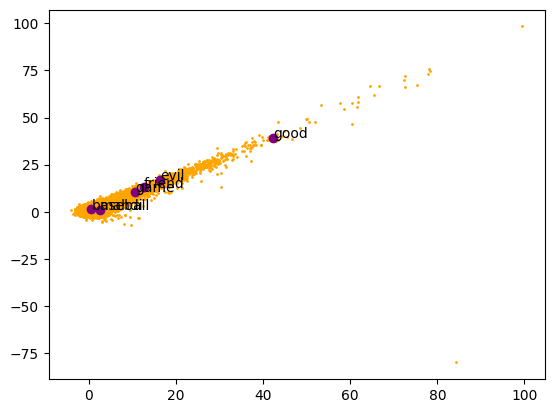

In [47]:
embeddings = model.embeddings.weight.data.cpu().numpy()

def plot_word(word):
    idx = words_index[word]
    # TODO: plot the word vector
    plt.scatter(embeddings[idx,0], embeddings[idx,1], color = 'purple')
    # add the word label to the plot
    plt.annotate(word, (embeddings[idx,0], embeddings[idx,1]))

print(embeddings.shape)
# plot embeddings
plt.scatter(embeddings[:,0], embeddings[:,1], color='orange', s = 1)
plot_word('mahdi')
plot_word('game')
plot_word('baseball')
plot_word('evil')
plot_word('good')
plot_word('friend')